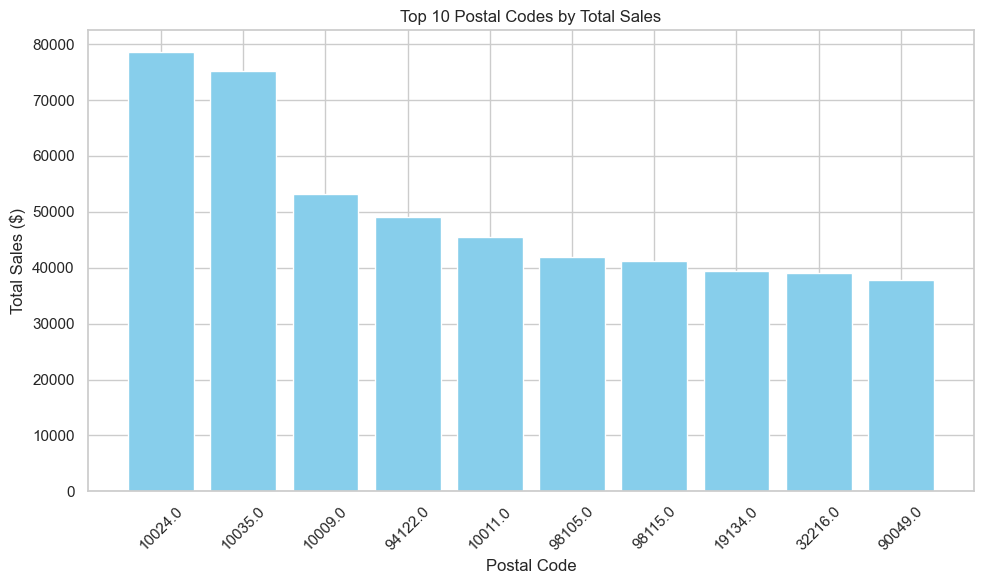

In [19]:

# : Data Visualizations

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the cleaned SQLite DB
conn = sqlite3.connect("sales.db")

# -------------------------
# Top 10 Postal Codes by Total Sales
top_postal_sales = pd.read_sql("""
SELECT postal_code,
       SUM(sales) AS total_sales
FROM sales
GROUP BY postal_code
ORDER BY total_sales DESC
LIMIT 10;
""", conn)

plt.figure(figsize=(10,6))
plt.bar(top_postal_sales['postal_code'].astype(str), top_postal_sales['total_sales'], color='skyblue')
plt.xlabel('Postal Code')
plt.ylabel('Total Sales ($)')
plt.title('Top 10 Postal Codes by Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



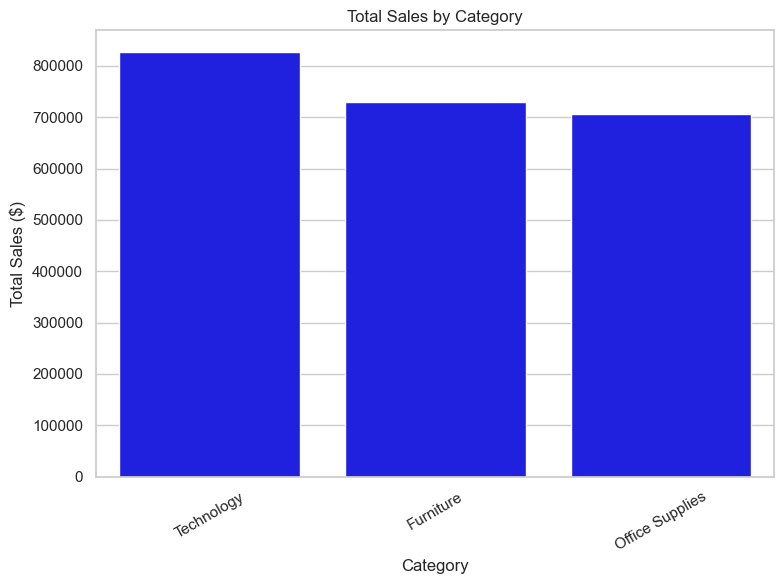

In [20]:

#  Sales by Category
category_sales = pd.read_sql("""
SELECT category,
       SUM(sales) AS total_sales
FROM sales
GROUP BY category
ORDER BY total_sales DESC;
""", conn)

plt.figure(figsize=(8,6))
sns.barplot(x='category', y='total_sales', data=category_sales, color='blue')
plt.xlabel('Category')
plt.ylabel('Total Sales ($)')
plt.title('Total Sales by Category')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


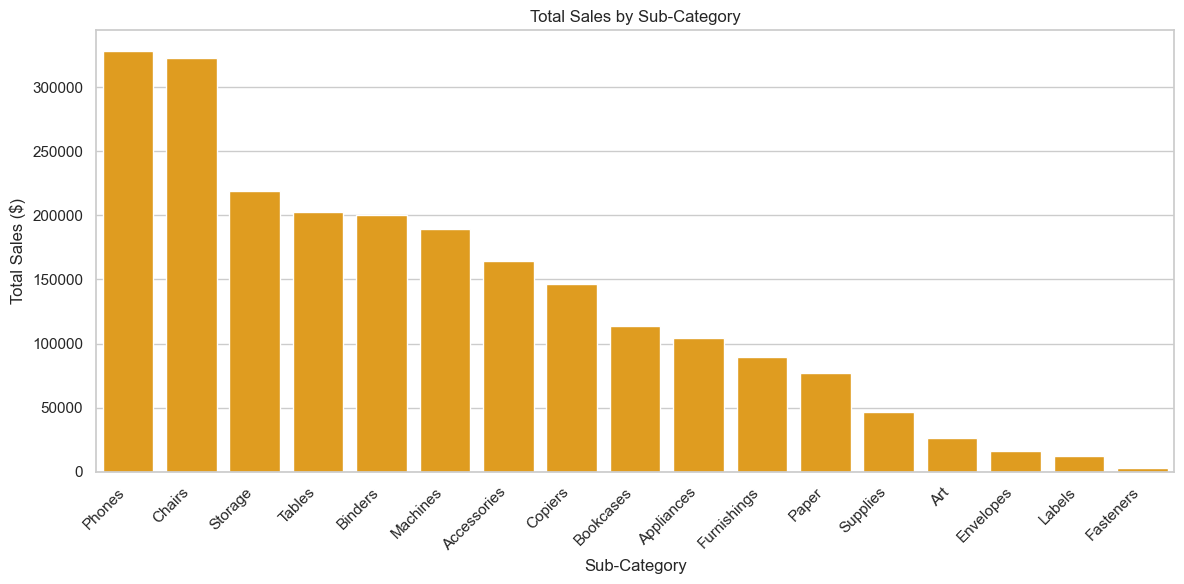

In [21]:


#  Sales by Sub-Category
subcategory_sales = pd.read_sql("""
SELECT sub_category,
       SUM(sales) AS total_sales
FROM sales
GROUP BY sub_category
ORDER BY total_sales DESC;
""", conn)

plt.figure(figsize=(12,6))
sns.barplot(x='sub_category', y='total_sales', data=subcategory_sales, color='orange')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales ($)')
plt.title('Total Sales by Sub-Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


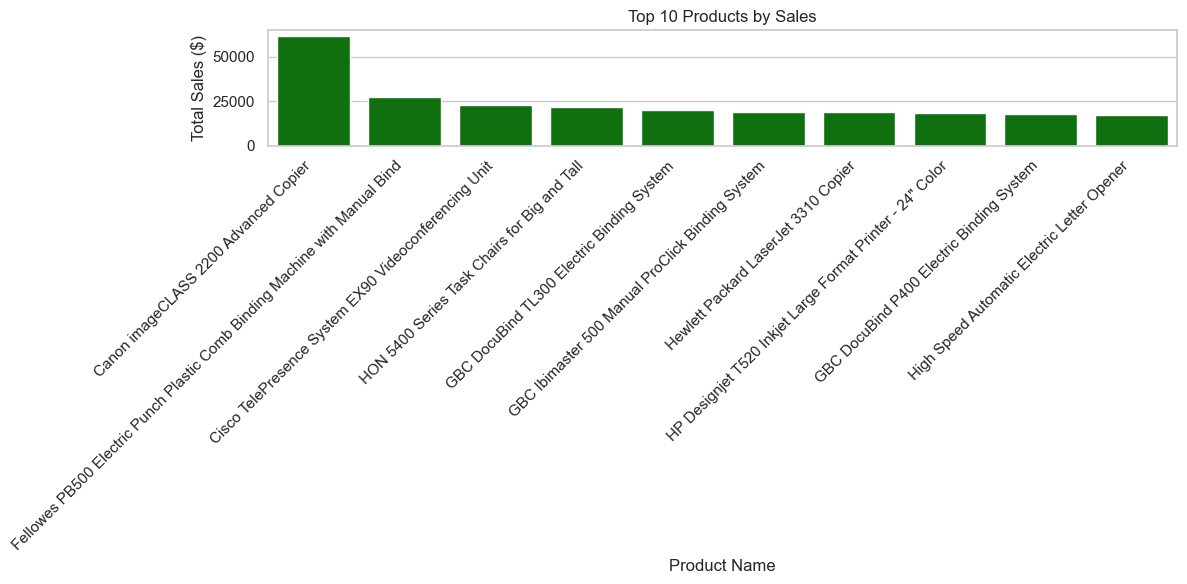

In [22]:


# Top 10 Products by Sales
top_products = pd.read_sql("""
SELECT product_name,
       SUM(sales) AS total_sales
FROM sales
GROUP BY product_name
ORDER BY total_sales DESC
LIMIT 10;
""", conn)

plt.figure(figsize=(12,6))
sns.barplot(x='product_name', y='total_sales', data=top_products, color='green')
plt.xlabel('Product Name')
plt.ylabel('Total Sales ($)')
plt.title('Top 10 Products by Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



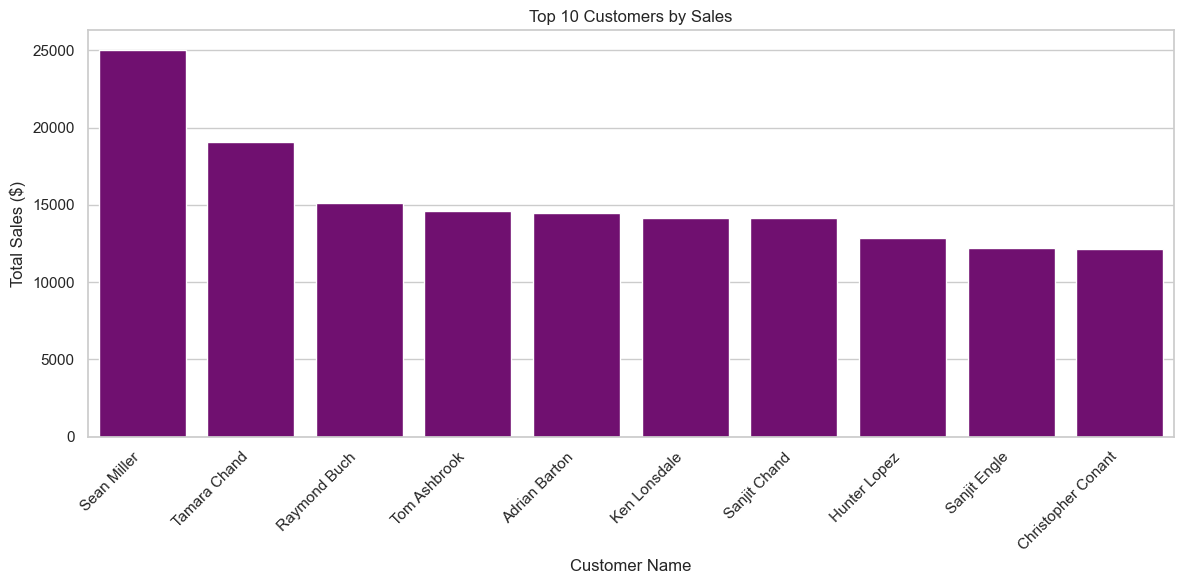

In [17]:

#  Top 10 Customers by Sales
top_customers = pd.read_sql("""
SELECT customer_name,
       SUM(sales) AS total_sales
FROM sales
GROUP BY customer_name
ORDER BY total_sales DESC
LIMIT 10;
""", conn)

plt.figure(figsize=(12,6))
sns.barplot(x='customer_name', y='total_sales', data=top_customers, color='purple')
plt.xlabel('Customer Name')
plt.ylabel('Total Sales ($)')
plt.title('Top 10 Customers by Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



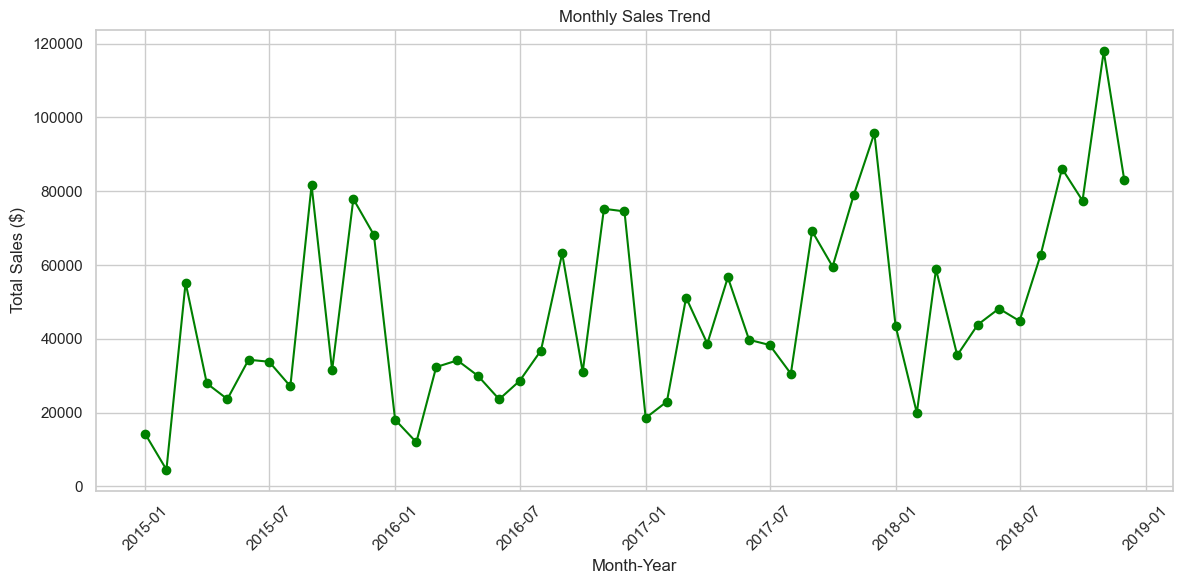

✅ All visualizations generated successfully!


In [23]:
# -------------------------
#  Monthly Sales Trend
monthly_sales = pd.read_sql("""
SELECT year, month, SUM(sales) AS total_sales
FROM sales
GROUP BY year, month
ORDER BY year, month;
""", conn)

monthly_sales['date'] = pd.to_datetime(monthly_sales[['year','month']].assign(day=1))

plt.figure(figsize=(12,6))
plt.plot(monthly_sales['date'], monthly_sales['total_sales'], marker='o', linestyle='-', color='green')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales ($)')
plt.title('Monthly Sales Trend')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


print("✅ All visualizations generated successfully!")
